In [1]:
#%matplotlib notebook
%matplotlib inline
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import os, sys
display(HTML("<style>.container { width:100% !important; }</style>"))
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [2]:
corpora_out = '/mnt/DATA/ML/data/corpora_out/'

In [3]:
def load_all_np(p):
    res = []
    i = 0
    while os.path.exists('%s.%i.np' % (p, i)):
        res.append(np.load('%s.%i.np' % (p, i)))
        i += 1
    if len(res) == 0:
        print('WARNING: no files found for %s' % p)
        return None
    return np.concatenate(res) 

In [117]:
#plt.style.use('seaborn-deep')
def plot_depths_and_lengths(path, corpus_name=None, xlim=(5,30)):
    if corpus_name is not None:
        path = os.path.join(path, corpus_name)
    lengths = load_all_np(path + '/length')
    depths = load_all_np(path + '/depth')
    if lengths is None and depths is None:
        return
    bins = np.linspace(0, xlim[1], 100)
    plt.figure(figsize=(10,5))
    if depths is not None:
        plt.hist(depths, bins, alpha=0.5, label='depth') #label='dbpedia_first100000')
    if lengths is not None:
        plt.hist(lengths, bins, alpha=0.5, label='length') #label='bioasq_first100000')
    plt.legend(loc='upper right')
    if corpus_name is not None:
        plt.title(corpus_name)
    axes = plt.gca()
    axes.set_xlim(xlim)

def plot_depths_and_lengths_all(corpora_path, corpus, suffix='', xlim=(5,30)):
    for corpus_type in ['', '_span', '_edges']:
        plot_depths_and_lengths(corpora_path, corpus_name='%s%s%s' % (corpus, corpus_type,suffix), xlim=xlim)
        

def trans_label(label, label_mapping = {'RDF': None, 'recemb': None, 'mc2': None, 'mc20': None, 'noner': None}):
    parts = label.split('/')
    parts_new = []
    for p in parts:
        parts_new.append('_'.join([label_mapping.get(p0, p0) for p0 in p.split('_') if label_mapping.get(p0, p0) is not None]))
    return '/'.join(parts_new)
        

def plot_multiple(datas, title=None, xlim=(5,30), normalize=True):
    
    #for data, label in datas:
    #    plt.hist(data, bins, alpha=0.5, label=trans_label(label))
    data, label = zip(*datas)
    #nbr_bins = 100 / len(data)
    nbr_bins = 100
    #nbr_bins = min(100, xlim[1] - xlim[0])
    #nbr_bins = (xlim[1] - xlim[0])
    bins = np.linspace(xlim[0], xlim[1], nbr_bins / len(datas))
    plt.figure(figsize=(10,5))
    if normalize:
        wheights = []
        for d in data:
            u, c = np.unique(d, return_counts=True)
            wheights.append(np.ones(len(d)) / max(c))
        plt.hist(data, bins, alpha=1.0, label=label, weights=wheights)
    else:
        plt.hist(data, bins, alpha=1.0, label=label)
    plt.legend(loc='upper right')
    if title is not None:
        plt.title(title)
    axes = plt.gca()
    axes.set_xlim(xlim)

def plot_all(corpora_path, data_fn, corpora, suffixes, xlim=(5,30), corpus_types=('', '_span', '_edges')):
    datas = []
    for i, corpus in enumerate(corpora):
        #for corpus_type in ['', '_span', '_edges']:
        for corpus_type in corpus_types:
            corpus_name = '%s%s%s' % (corpus, corpus_type, suffixes[i])
            fn = os.path.join(corpora_path, corpus_name, data_fn)
            #print('load %s...' % fn)
            data = load_all_np(fn)
            if data is not None:
                
                u, c = np.unique(data, return_counts=True)
                nbr_tokens_all = sum(u * c)
                nbr_cut = np.sum(c[u > xlim[1]])
                nbr_tokens_cut = xlim[1] * nbr_cut
                nbr_tokens_not_cut = sum(c[u <= xlim[1]] * u[u <= xlim[1]])
                #proportion_cut = nbr_cut / float(np.sum(c))
                proportion_cut = (nbr_tokens_all - nbr_tokens_not_cut - nbr_tokens_cut) / float(nbr_tokens_all)
                #print('%s: \tnbr_tokens_all=%i\tnbr_tokens_cut=%i\tnbr_tokens_not_cut=%i' % (corpus_name, nbr_tokens_all, nbr_tokens_cut, nbr_tokens_not_cut))
                print('%s: \tproportion_cut=%.3f' % (corpus_name, proportion_cut))
                #data_norm = data / float(max(data))
                datas.append((data, corpus_name))
    plot_multiple(datas, title=data_fn, xlim=xlim)

SEMEVAL2010T8_RDF/corenlp_recemb_arg_mc2: 	proportion_cut=0.000
TACRED_RDF/None_recemb_arg_mc20: 	proportion_cut=0.000
SICK_RDF/corenlp_noner_recemb_mc2: 	proportion_cut=0.000


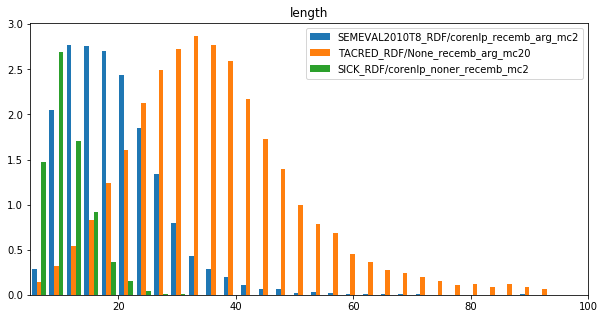

In [118]:
plot_all(corpora_path=corpora_out + 'FINAL', data_fn='length', corpora=('SEMEVAL2010T8_RDF/corenlp_recemb_arg','TACRED_RDF/None_recemb_arg', 'SICK_RDF/corenlp_noner_recemb',), suffixes=('_mc2','_mc20', '_mc2', ), corpus_types=('',), xlim=(5,100))
#plot_all(corpora_path=corpora_out + 'FINAL', data_fn='length', corpora=('SEMEVAL2010T8_RDF/corenlp_recemb_arg','SICK_RDF/corenlp_noner_recemb',), suffixes=('_mc2', '_mc2', ), corpus_types=('',), xlim=(5,40))

IMDB_RDF/corenlp_noner_recemb_mc20: 	proportion_cut=0.092


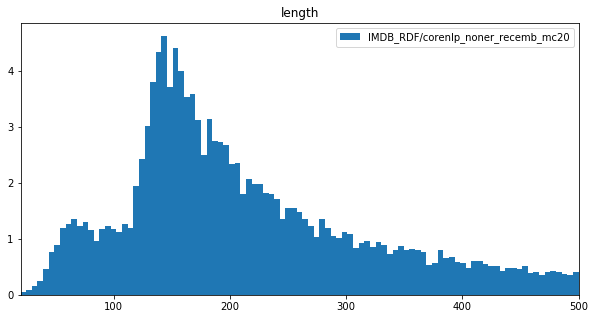

In [119]:
plot_all(corpora_path=corpora_out + 'FINAL', data_fn='length', corpora=('IMDB_RDF/corenlp_noner_recemb',), suffixes=('_mc20',), corpus_types=('',), xlim=(20,500))

SEMEVAL2010T8_RDF/corenlp_recemb_arg_mc2: 	proportion_cut=0.000
TACRED_RDF/None_recemb_arg_mc20: 	proportion_cut=0.001
SICK_RDF/corenlp_noner_recemb_mc2: 	proportion_cut=0.000


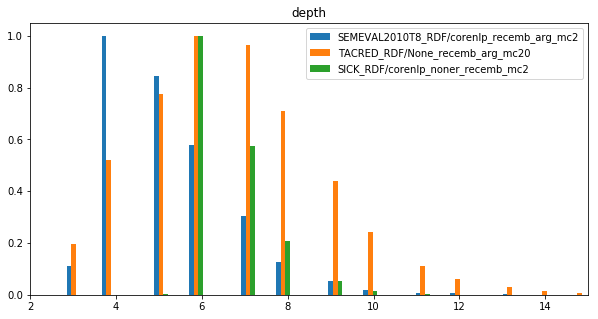

In [120]:
plot_all(corpora_path=corpora_out + 'FINAL', data_fn='depth', corpora=('SEMEVAL2010T8_RDF/corenlp_recemb_arg','TACRED_RDF/None_recemb_arg', 'SICK_RDF/corenlp_noner_recemb',), suffixes=('_mc2','_mc20', '_mc2', ), corpus_types=('',), xlim=(2,15))

IMDB_RDF/corenlp_noner_recemb_mc20: 	proportion_cut=0.006


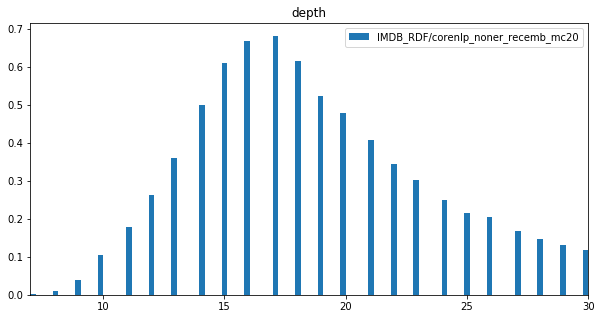

In [126]:
plot_all(corpora_path=corpora_out + 'FINAL', data_fn='depth', corpora=('IMDB_RDF/corenlp_noner_recemb',), suffixes=('_mc20',), corpus_types=('',), xlim=(7,30))

In [122]:
#corp_path = '/mnt/DATA/ML/data/corpora_out/FINAL/TACRED_RDF/None_recemb_arg_mc20/length'
#corp_path = '/mnt/DATA/ML/data/corpora_out/FINAL/IMDB_RDF/corenlp_noner_recemb_mc20/length'
corp_path = '/mnt/DATA/ML/data/corpora_out/FINAL/SEMEVAL2010T8_RDF/corenlp_recemb_arg_mc2/length'
lengths = load_all_np(corp_path)
np.sum(lengths) / float(len(lengths))

19.088015680418145

In [21]:
len(lengths)

10714

In [14]:
np.sum(tacred_lengths) / float(len(tacred_lengths))

36.389209892343594